In [19]:
import numpy as np
np.random.seed(2023 - 7 - 1)
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

# ___Testing Population Means With Confidence___
-----------------

In [3]:
# let's use our iol temperature data.

oil = pd.read_csv("./../data/MetroPT3(AirCompressor).csv", usecols = ["Oil_temperature"])

In [5]:
oil.shape

(999999, 1)

In [6]:
oil.mean()

Oil_temperature    60.91454
dtype: float64

## ___Considering The Dataset as a Sample of a Larger Population___
--------------------

In [7]:
# best estimate will be the sample mean.

best_est = oil.Oil_temperature.mean()
best_est

60.91453961453962

In [8]:
# sample size 

ssize = oil.shape[0]
ssize

999999

In [16]:
# Significance level 5%, alpha = 0.05.
# i.e We accept that 5 out of 100 times, we may get the given test statistic (t) completely randomly, due to chance.
# That is if the probability of randomly getting our t statistic is greater than 0.05, we refuse to accept the null hypothesis.

# Null hypothesis: Population mean is 61 degrees celsius.
# H0: mu = 61

# Alternative hypothesis: Population mean is greater than 61 degrees celsius
# H1: mu > 61

In [44]:
# test statistic = (best estimate - hypothesized estimate) / standard error of the estimate
# We do not know the standard error of the population, so we'll use the standard error of the sample.
# estimated standard error

stderr = oil.Oil_temperature.std() / np.sqrt(ssize)
stderr

0.006738252131068929

In [18]:
tscore = (best_est - 61) / stderr
tscore

-12.68287143283586

In [ ]:
# How do we interpret this t statistic?
# Our actual population mean is 12.6828 times the standard errors less than our hypothesized mean.

In [20]:
# Assumptions

# 1) Our sample is a simple random sample.
# 2) Our sample means come from a normal distribution.

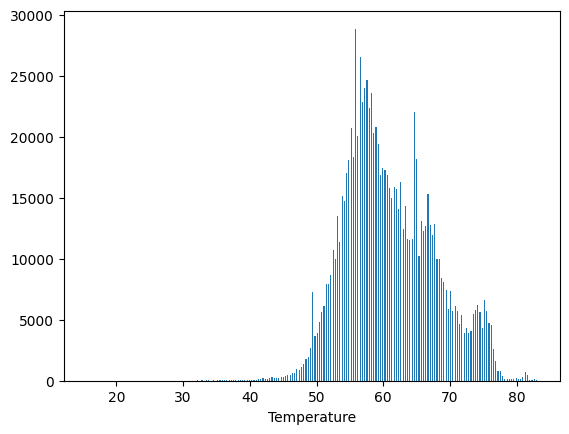

In [43]:
fig, axes = plt.subplots()
axes.hist(oil.Oil_temperature, bins = 200, rwidth = 0.5)
axes.set_xlabel("Temperature")
plt.show()

In [32]:
np.linspace(0, 1, num = 20, endpoint = False)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

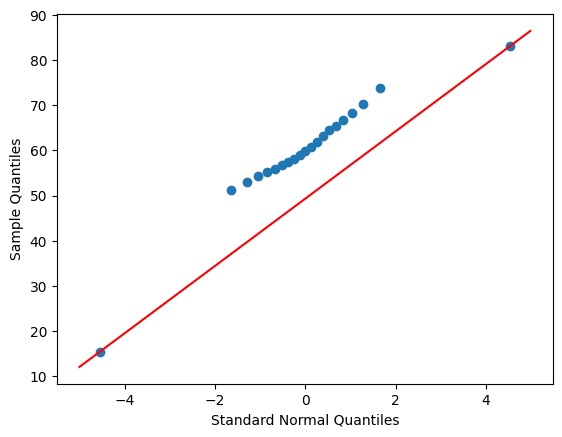

In [38]:
# Our sample seems left skewed, oopsies.
# Let's have a QQ plot.

q = np.linspace(0, 1, num = 21)
snorm = np.random.standard_normal(size = ssize)

q_snorm = np.quantile(snorm, q)
q_sample = np.quantile(oil.Oil_temperature, q)

fig, axes = plt.subplots()
axes.scatter(q_snorm, q_sample)
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "red")
axes.set_xlabel("Standard Normal Quantiles")
axes.set_ylabel("Sample Quantiles")
plt.show()

In [39]:
# There are deviations in the QQ plot!

In [46]:
# p value

p = t.cdf(tscore, df = ssize - 1)
p

3.703464581479672e-37